In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as mn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

### Data Preprocessing

In [2]:
# Load data
df = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [3]:
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.108128,0.004002,0.088517,0.015608,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.852925,0.019697,0.426075,0.407153,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.139890,0.004617,0.094770,0.040503,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.038230,0.000944,0.018138,0.019147,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.133673,0.003061,0.124490,0.006122,98000.0,%


In [4]:
# Exclude unnecessary columns
df = df.select_dtypes(include=['number'])
df.head()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
0,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.0770,0.5345,6.7642,40.5645,4.5,0.108128,0.004002,0.088517,0.015608,38928000.0
1,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.1515,0.3261,11.7753,31.2304,22.3,0.852925,0.019697,0.426075,0.407153,2838000.0
2,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.1152,1.0310,11.6484,40.3651,26.6,0.139890,0.004617,0.094770,0.040503,44357000.0
3,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.0061,0.6463,2.3041,45.0722,6.8,0.038230,0.000944,0.018138,0.019147,32522000.0
4,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.0253,0.8102,5.4495,33.3233,19.1,0.133673,0.003061,0.124490,0.006122,98000.0


<AxesSubplot:>

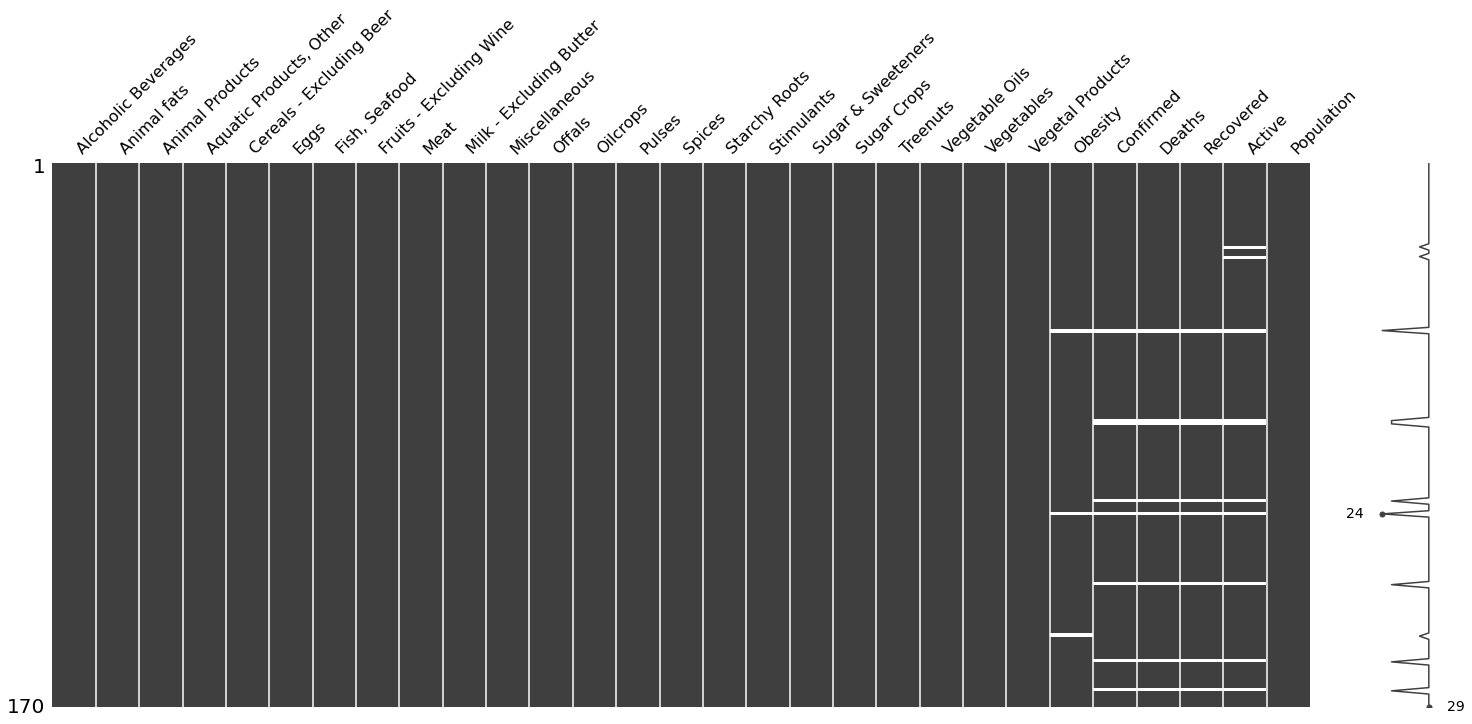

In [5]:
# Check existence of missing values
mn.matrix(df)

In [6]:
# Impute missing values
imputer = IterativeImputer()

In [7]:
df.loc[:, :] = imputer.fit_transform(df)

In [8]:
df.isnull().sum().sum()

0

<AxesSubplot:>

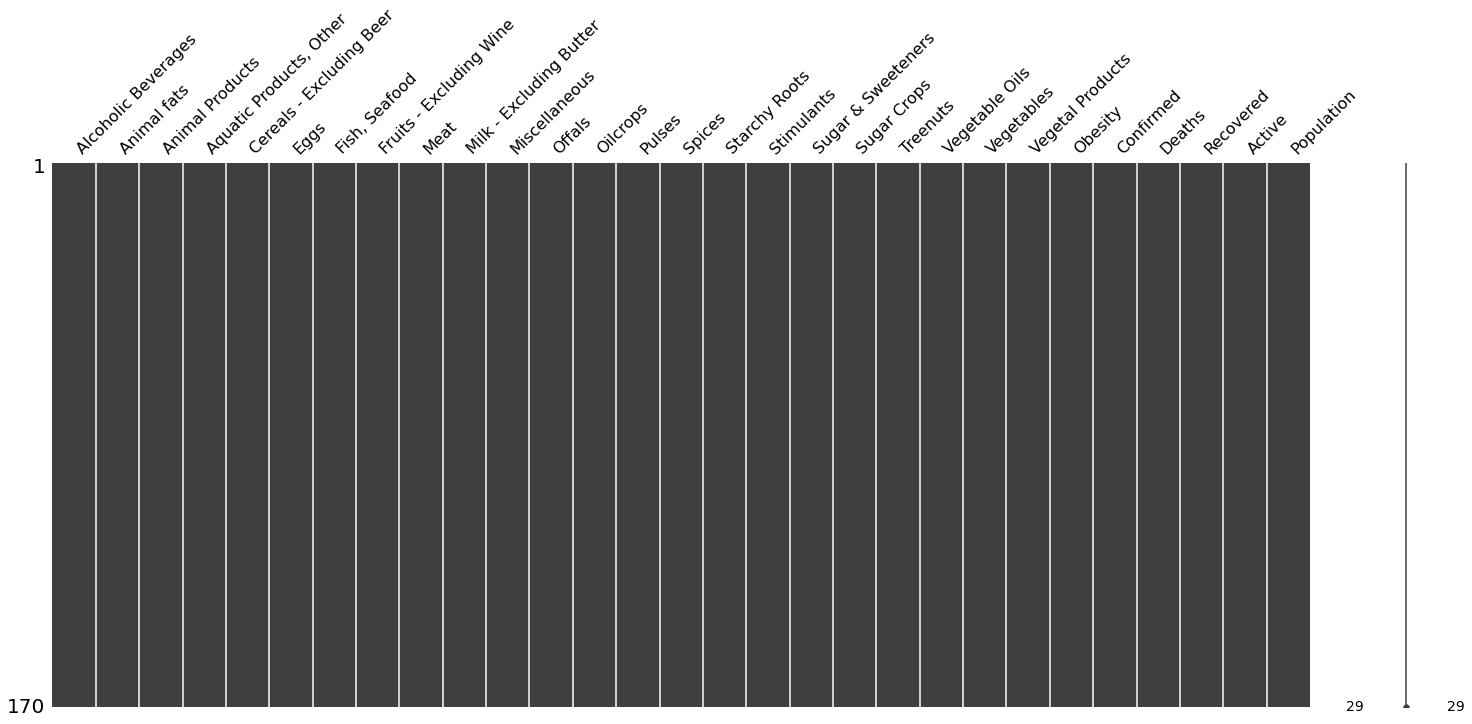

In [9]:
mn.matrix(df)

In [10]:
y_death = df['Deaths'] / df['Confirmed']
y_recover = df['Recovered'] / df['Confirmed']
df = df[df.columns[1:-5]]
df.head()

,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity
0,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,...,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5
1,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,...,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3
2,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,...,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6
3,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,...,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8
4,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,0.7139,...,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233,19.1


In [11]:
scaler = StandardScaler()

In [12]:
df.loc[:, :] = scaler.fit_transform(df)

In [13]:
df.head()

,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,...,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity
0,-0.085639,-0.470880,-0.108476,2.240013,-0.789352,-1.078583,-0.086496,-1.236793,0.212367,-0.541639,...,-0.276546,-0.802019,0.561017,-0.940844,-0.253013,-0.277764,-0.714046,0.191085,0.471180,-1.498344
1,-0.307633,1.128720,-0.108476,-1.036320,0.335914,-0.936919,0.370502,-0.848505,1.838249,-0.483865,...,-0.742239,-0.634709,-0.511160,-0.819007,-0.253013,0.233519,-1.183391,1.602797,-1.128302,0.365901
2,-0.695042,-0.436726,-0.108476,0.323923,0.172999,-0.913788,0.241349,-1.277471,0.219579,-0.403714,...,-0.290533,-0.216270,0.104162,-0.626000,-0.253013,-0.015603,0.404137,1.567047,0.437011,0.816253
3,-0.594856,-1.243116,-0.108476,-0.463495,-1.247210,0.305904,0.120594,-0.750310,-1.136464,-0.477722,...,-0.741417,2.299722,-0.801067,-0.616074,-0.253013,-0.764340,-0.462258,-1.065401,1.243615,-1.257458
4,-0.765316,0.767631,-0.108476,-0.999421,-0.736359,2.202882,1.629901,1.315835,-0.030661,0.396043,...,0.505095,-0.699048,-0.241393,0.697928,-0.253013,-0.632573,-0.093134,-0.179288,-0.769665,0.030756


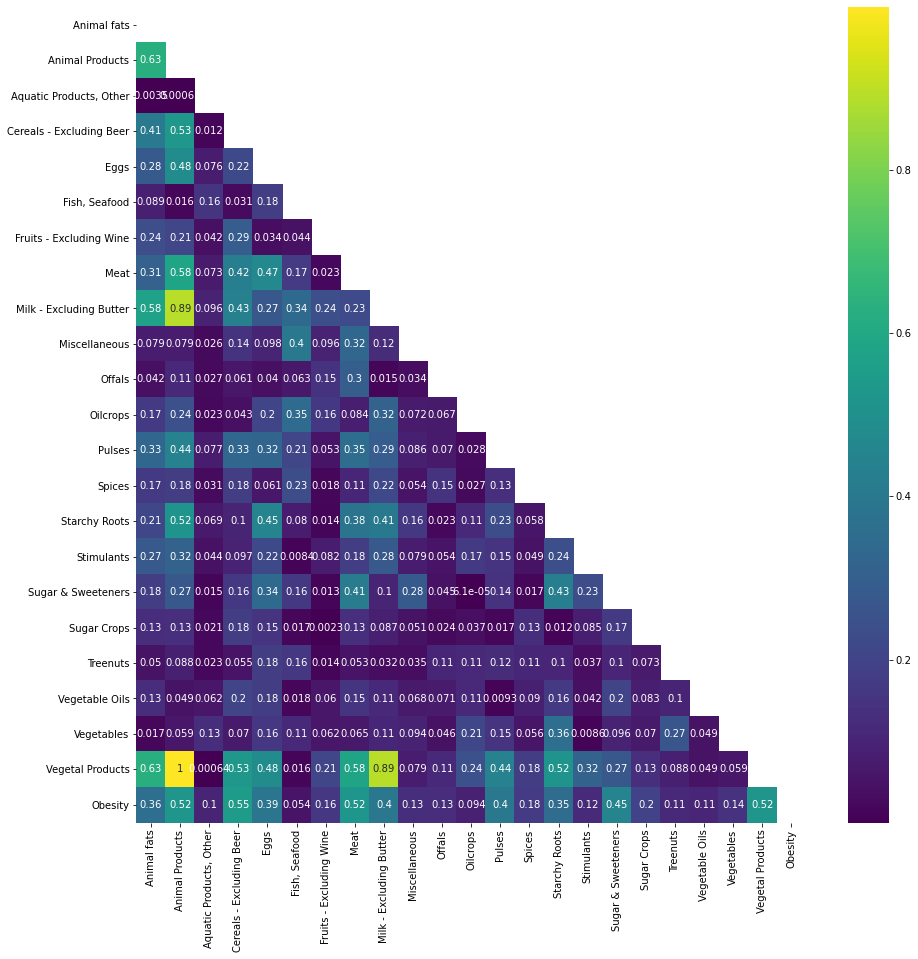

In [14]:
# Exclude highly correlated variables
plt.figure(figsize=(15, 15))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis')
plt.show()

In [15]:
df = df.drop('Animal Products', axis=1).drop('Milk - Excluding Butter', axis=1)

### Prediction with GridSearchCV

In [16]:
X = df.to_numpy() # X is the percentage of protein intake from different types of food in different countries
# y = y_death # Here, y is the ratio of death cases over confirmed cases in different countries
y = y_recover # Here, y is the ratio of recovered cases over confirmed cases in different countries

In [17]:
# Train test split
X_train,X_valid,y_train,y_valid=\
    model_selection.train_test_split(X,y,random_state=42)

In [18]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [19]:
params = {
    'n_estimators': [50, 100],
    'max_features': [0.1, 0.3],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [20]:
reg = RandomForestRegressor()

In [21]:
%%time
reg_gs = GridSearchCV(
    reg, 
    params, 
    n_jobs=-1,
    cv=5
).fit(X_train, y_train)

CPU times: user 750 ms, sys: 101 ms, total: 851 ms
Wall time: 13.1 s


In [22]:
reg_f = RandomForestRegressor(**reg_gs.best_params_)
reg_f.fit(X_train, y_train)
reg_f.score(X_valid, y_valid)

0.2381476186149346

In [23]:
y_hat_reg = reg_f.predict(X_valid)
r2_rf = r2_score(y_hat_reg, y_valid)
mse_rf = mean_squared_error(y_hat_reg, y_valid)
print(f"r2 score for random forest: {r2_rf}, mse score for random forest: {mse_rf}")

r2 score for random forest: -6.472739517545266, mse score for random forest: 0.0531195584029112


### Interpretation

In [24]:
r = permutation_importance(reg_f, 
                           X_valid, 
                           y_valid,
                           n_repeats=30,
                           random_state=42)

In [25]:
features = df.columns.to_list()

In [26]:
(
    pd.DataFrame(zip(features, r.importances_mean), 
             columns=['Feature', 'Permutation Importance']).
    sort_values('Permutation Importance', key=lambda x: -np.abs(x))
)

,Feature,Permutation Importance
19,Vegetal Products,0.068430
2,Cereals - Excluding Beer,0.043710
0,Animal fats,0.030062
20,Obesity,0.029524
3,Eggs,0.017440
4,"Fish, Seafood",0.015198
8,Offals,-0.013589
18,Vegetables,-0.010193
6,Meat,0.008575
5,Fruits - Excluding Wine,0.006987


Feature: Animal fats, Score: 0.07195
Feature: Aquatic Products, Other, Score: 0.01963
Feature: Cereals - Excluding Beer, Score: 0.08323
Feature: Eggs, Score: 0.05958
Feature: Fish, Seafood, Score: 0.02797
Feature: Fruits - Excluding Wine, Score: 0.05175
Feature: Meat, Score: 0.05994
Feature: Miscellaneous, Score: 0.03584
Feature: Offals, Score: 0.07823
Feature: Oilcrops, Score: 0.02501
Feature: Pulses, Score: 0.04001
Feature: Spices, Score: 0.04906
Feature: Starchy Roots, Score: 0.02673
Feature: Stimulants, Score: 0.05939
Feature: Sugar & Sweeteners, Score: 0.04128
Feature: Sugar Crops, Score: 0.02010
Feature: Treenuts, Score: 0.04876
Feature: Vegetable Oils, Score: 0.03645
Feature: Vegetables, Score: 0.04274
Feature: Vegetal Products, Score: 0.06890
Feature: Obesity, Score: 0.05343


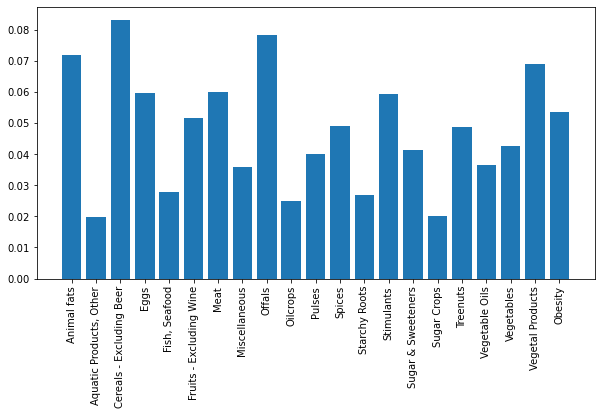

In [43]:
plt.figure(figsize=(10,5))
importance = reg_f.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))
# Plot feature importance
plt.bar(features, importance)
plt.xticks(features, rotation='vertical')
plt.show()

### GBM

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [32]:
params_gbm = {
    'learning_rate': [0.1,0.2,0.3],
    'max_features': [0.1, 0.3, 0.5, 'sqrt', 'log'],
    'n_estimators': [50,75,100,125],
    'max_depth': [1,2,3,5,10],
    'min_samples_leaf': [1,3,5,10,15]
}

In [33]:
gbm = GradientBoostingRegressor(random_state = 6)

In [34]:
%%time
gbm_grid = GridSearchCV(
    gbm, 
    params_gbm, 
    n_jobs=-1,
    cv=5
).fit(X_train, y_train)

CPU times: user 4.57 s, sys: 68 ms, total: 4.64 s
Wall time: 31.5 s


In [35]:
gbm_f = GradientBoostingRegressor(**gbm_grid.best_params_)
gbm_f.fit(X_train, y_train)
gbm_f.score(X_valid, y_valid)

0.2848315054381999

In [36]:
y_pred = gbm_f.predict(X_valid)
r2_rf = r2_score(y_pred, y_valid)
mse_rf = mean_squared_error(y_pred, y_valid)
print(f"r2 score for gradient boosting machine: {r2_rf}, mse score for gradient boosting machine: {mse_rf}")

r2 score for gradient boosting machine: -3.8021992588558096, mse score for gradient boosting machine: 0.04986456109217896


### plot training deviance

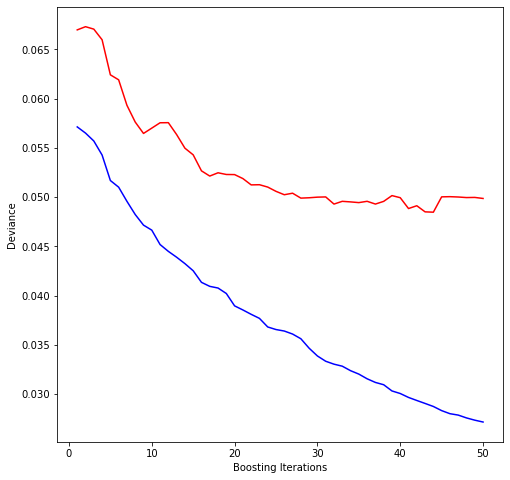

In [41]:
params = gbm_grid.best_params_
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbm_f.staged_predict(X_valid)):
    test_score[i] = gbm_f.loss_(y_valid, y_pred)

fig = plt.figure(figsize=(8, 8))
plt.plot(np.arange(params['n_estimators']) + 1, gbm_f.train_score_, 'b-', label='Training Set deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label = 'Test Set deviance')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

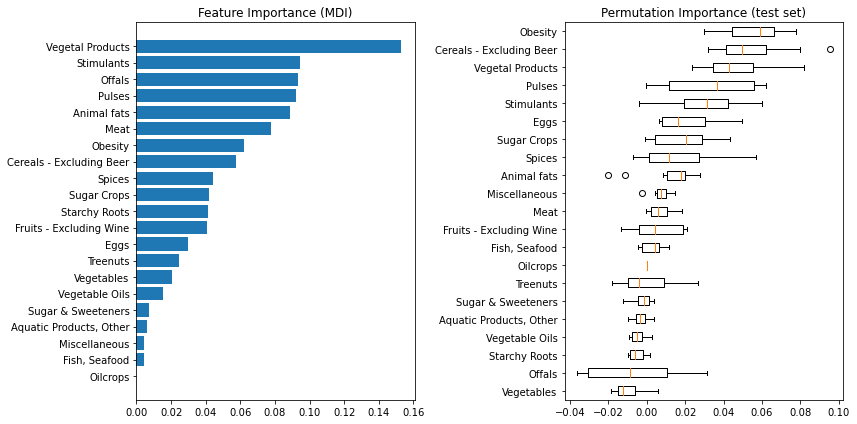

In [46]:
feature_importance = gbm_f.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(gbm_f, X_valid, y_valid, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(df.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()